In [1]:
%matplotlib inline



The :class:`Raw <mne.io.Raw>` data structure: continuous data
=============================================================

Continuous data is stored in objects of type :class:`Raw <mne.io.Raw>`.
The core data structure is simply a 2D numpy array (channels × samples)
(in memory or loaded on demand) combined with an
:class:`Info <mne.Info>` object (`.info` attribute)
(see `tut_info_objects`).

The most common way to load continuous data is from a .fif file. For more
information on `loading data from other formats <ch_convert>`, or
creating it `from scratch <tut_creating_data_structures>`.



In [2]:
import mne
import os.path as op
from matplotlib import pyplot as plt

Loading continuous data
-----------------------

Load an example dataset, the preload flag loads the data into memory now:



In [3]:
data_path = op.join(mne.datasets.sample.data_path(), 'MEG',
                    'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(data_path, preload=True)
raw.set_eeg_reference('average', projection=True)  # set EEG average reference

# Give the sample rate
print('sample rate:', raw.info['sfreq'], 'Hz')
# Give the size of the data matrix
print('%s channels x %s samples' % (len(raw), len(raw.times)))

Opening raw data file /local_mount/space/meghnn/1/users/mjas/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
sample rate: 600.614990234375 Hz
166800 channels x 166800 samples


<div class="alert alert-info"><h4>Note</h4><p>This size can also be obtained by examining `raw._data.shape`.
          However this is a private attribute as its name starts
          with an `_`. This suggests that you should **not** access this
          variable directly but rely on indexing syntax detailed just below.</p></div>



Information about the channels contained in the :class:`Raw <mne.io.Raw>`
object is contained in the :class:`Info <mne.Info>` attribute.
This is essentially a dictionary with a number of relevant fields (see
`tut_info_objects`).



Indexing data
-------------

To access the data stored within :class:`Raw <mne.io.Raw>` objects,
it is possible to index the :class:`Raw <mne.io.Raw>` object.

Indexing a :class:`Raw <mne.io.Raw>` object will return two arrays: an array
of times, as well as the data representing those timepoints. This works
even if the data is not preloaded, in which case the data will be read from
disk when indexing. The syntax is as follows:



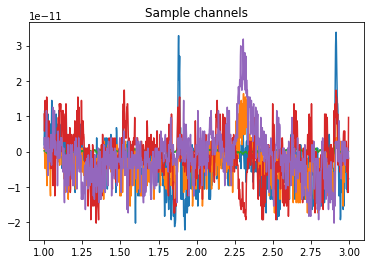

In [4]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
data, times = raw[:5, int(sfreq * 1):int(sfreq * 3)]
_ = plt.plot(times, data.T)
_ = plt.title('Sample channels')

-----------------------------------------
Selecting subsets of channels and samples
-----------------------------------------

It is possible to use more intelligent indexing to extract data, using
channel names, types or time ranges.



In [5]:
# Pull all MEG gradiometer channels:
# Make sure to use .copy() or it will overwrite the data
meg_only = raw.copy().pick_types(meg=True)
eeg_only = raw.copy().pick_types(meg=False, eeg=True)

# The MEG flag in particular lets you specify a string for more specificity
grad_only = raw.copy().pick_types(meg='grad')

# Or you can use custom channel names
pick_chans = ['MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123']
specific_chans = raw.copy().pick_channels(pick_chans)
print(meg_only)
print(eeg_only)
print(grad_only)
print(specific_chans)

<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 305 x 166800 (277.7 sec), ~391.7 MB, data loaded>
<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 59 x 166800 (277.7 sec), ~78.2 MB, data loaded>
<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 203 x 166800 (277.7 sec), ~261.7 MB, data loaded>
<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 4 x 166800 (277.7 sec), ~8.1 MB, data loaded>


Notice the different scalings of these types



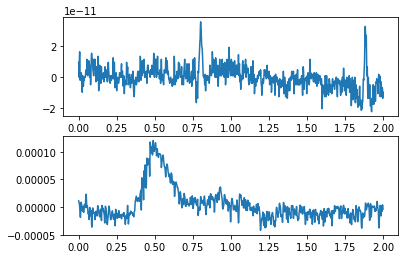

In [6]:
f, (a1, a2) = plt.subplots(2, 1)
eeg, times = eeg_only[0, :int(sfreq * 2)]
meg, times = meg_only[0, :int(sfreq * 2)]
a1.plot(times, meg[0])
a2.plot(times, eeg[0])
del eeg, meg, meg_only, grad_only, eeg_only, data, specific_chans

You can restrict the data to a specific time range



In [7]:
raw = raw.crop(0, 50)  # in seconds
print('New time range from', raw.times.min(), 's to', raw.times.max(), 's')

New time range from 0.0 s to 50.00041705299622 s


And drop channels by name



In [8]:
nchan = raw.info['nchan']
raw = raw.drop_channels(['MEG 0241', 'EEG 001'])
print('Number of channels reduced from', nchan, 'to', raw.info['nchan'])

Number of channels reduced from 376 to 374


--------------------------------------------------
Concatenating :class:`Raw <mne.io.Raw>` objects
--------------------------------------------------

:class:`Raw <mne.io.Raw>` objects can be concatenated in time by using the
:func:`append <mne.io.Raw.append>` function. For this to work, they must
have the same number of channels and their :class:`Info
<mne.Info>` structures should be compatible.



In [9]:
# Create multiple :class:`Raw <mne.io.RawFIF>` objects
raw1 = raw.copy().crop(0, 10)
raw2 = raw.copy().crop(10, 20)
raw3 = raw.copy().crop(20, 40)

# Concatenate in time (also works without preloading)
raw1.append([raw2, raw3])
print('Time extends from', raw1.times.min(), 's to', raw1.times.max(), 's')

Time extends from 0.0 s to 40.00399655463821 s
